# CS273A Homework 2

## Due Wednesday October 15th, 2025, 11:59pm

---
## Instructions

Like Homework 1, this homework involves data analysis and reporting on methods and results
using Python code. You will submit a **single PDF file** that contains everything to Gradescope. This includes any text you wish to include to describe your results, the complete code snippets of how you attempted each problem, any figures that were generated, and scans of any work on paper that you wish to include. It is important that you include enough detail that we know how you solved the problem, since otherwise we will be unable to grade it.

Again, you may use this Jupyter notebook as a template to get you started.  I recommend liberal use of Markdown cells to create headers for each problem and sub-problem, explaining your implementation/answers, and including any mathematical equations. For parts of the homework you do on paper, scan it in such that it is legible (there are a number of free Android/iOS scanning apps, if you do not have access to a scanner), and include it as an image in the Jupyter notebook.

**Double check that all of your answers are legible on Gradescope, e.g. make sure any text you have written does not get cut off.**

If you have any questions/concerns about using Jupyter notebooks, ask us on EdD. If you decide not to use Jupyter notebooks, but go with Microsoft Word or LaTeX to create your PDF file, make sure that all of the answers can be generated from the code snippets included in the document.

### Summary of Assignment: 100 total points
- Problem 1: k-Nearest Neighbors (20 points)
    - Problem 1.1: Splitting data into training & test sets (8 points)
    - Problem 1.2: Plot predictions for different values of k (8 points)
    - Problem 1.3: Display performance as a function of k & select best (4 points)
- Problem 2: Linear Regression (20 points)
    - Problem 2.1: Train the model and plot the data along with its predictions (10 points)
    - Problem 2.2: Compute the MSE loss for the training and evaluation data (10 points)
- Problem 3: Feature transformations (20 points)
    - Problem 3.1: Train & display polynomial regression models using feature transforms (10 points)
    - Problem 3.2: Plot the training & evaluation error as a function of degree (5 points)
    - Problem 3.3: Select the best degree for these data (5 points)
- Problem 4: Cross-Validation (20 points)
    - Problem 4.1: Plot the five-fold cross validation error (10 points)
    - Problem 4.2: Select the best degree using cross-validation (5 points)
    - Problem 4.3: Compare cross-validation model selection to hold-out data (5 points)
- Problem 5: Regularization (15 points)
    - Problem 5.1: Train L2-regularized linear regression ('Ridge regression') (5 points)
    - Problem 5.2: Plot MSE as a function of the regularization amount (5 points)
    - Problem 5.3: Select the best amount of regularization (5 points)
- Statement of Collaboration (5 points)

<center> 
    <div>
    <img src="data:image/svg+xml,%3C%3Fxml%20version%3D%221.0%22%20encoding%3D%22UTF-8%22%20standalone%3D%22no%22%3F%3E%0A%3C%21DOCTYPE%20svg%20PUBLIC%20%22-//W3C//DTD%20SVG%201.1//EN%22%20%22http%3A//www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd%22%3E%0A%3Csvg%20stroke-miterlimit%3D%2210%22%20style%3D%22fill-rule%3Anonzero%3Bclip-rule%3Aevenodd%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Around%3B%22%20version%3D%221.1%22%20viewBox%3D%220%200%20288%2072%22%20xml%3Aspace%3D%22preserve%22%20xmlns%3D%22http%3A//www.w3.org/2000/svg%22%20xmlns%3Axlink%3D%22http%3A//www.w3.org/1999/xlink%22%3E%0A%3Cdefs/%3E%0A%3Cg%20id%3D%22Layer-1%22%3E%0A%3Cpath%20d%3D%22M34.042%2035.8741C45.8469%2023.244%2031.1794%2022.6473%2024.2857%2024.1167C17.3921%2025.5861-0.960215%2033.2987%206.07817%2043.4256C13.1166%2053.5525%2023.0237%2056.9377%2052.2446%2053.4091C81.4656%2049.8804%2097.2436%2032.811%20122.962%2029.3111C148.681%2025.8112%20155.118%2039.4093%20155.118%2039.4093%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3Cpath%20d%3D%22M254.053%2040.6889C242.328%2053.1071%20256.999%2053.6247%20263.883%2052.1549C270.768%2050.685%20289.071%2043.0512%20281.969%2033.1691C274.868%2023.287%20264.94%2020.0179%20235.741%2023.6051C206.543%2027.1922%20190.872%2043.9744%20165.176%2047.5176C139.48%2051.0607%20132.957%2037.7776%20132.957%2037.7776%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3C/g%3E%0A%3C/svg%3E%0A" width="200"/>
</div>
</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss
from sklearn.metrics import mean_squared_error as mse

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.linear_model import LinearRegression    # Basic Linear Regression
from sklearn.linear_model import Ridge               # Linear Regression with L2 regularization

from sklearn.model_selection import KFold            # Cross-validation tools

from sklearn.preprocessing import PolynomialFeatures # Feature transformations
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline                # Useful for sequences of transforms

import requests                                      # reading data
from io import StringIO

seed = 1234

# Training / Test Splits

As we've seen in lecture, it is difficult to tell how accurate our model is from only the data on which it has been trained.  For this reason, we usually reserve some data for evaluation, often called "validation" or "test" data.  We'll start by loading a one-dimensional regression data set to use in the rest of the homework.  We will divide this data set into 75% training data, and 25% evaluation data:

In [2]:
url = 'https://www.ics.uci.edu/~ihler/classes/cs273/data/curve80.txt'

with requests.get(url) as link: curve = np.genfromtxt(StringIO(link.text),delimiter=None)

X = curve[:,0:-1]      # extract features
Y = curve[:,-1]        # extract target values

# split into training and evaluation data
Xt, Xe, Yt, Ye = train_test_split(X, Y, test_size=0.25, random_state=seed)

# P1: K-Nearest Neighbors Regression

### P1.1: Visualizing the Data Splits

Plot the data for this regression problem, with the (scalar) feature $x$ along the horizontal axis, and the real-valued target $y$ as the vertical axis.  Plot all the data, displaying the training data $X_t$ in one color, and the evaluation data $X_e$ in a different color.

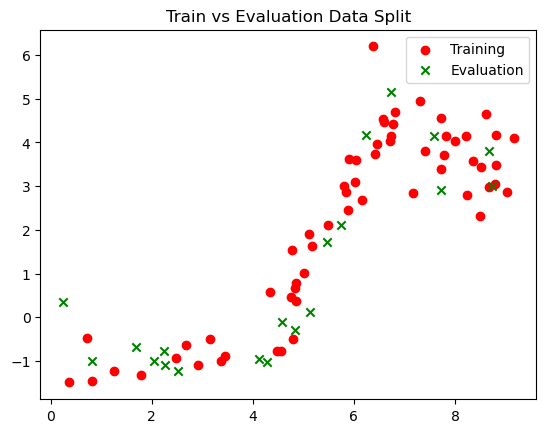

In [3]:
plt.scatter(Xt,Yt, c = 'r',label="Training")
plt.scatter(Xe,Ye, c = 'g',marker='x', label="Evaluation")
plt.legend()
plt.title("Train vs Evaluation Data Split")
plt.show()

### P1.2 Visualizing KNN Regression Predictions

Now use `sklearn`'s `KNeighborsRegressor` class to build a nearest neighbor regression model on your training data.  Build three models, using $k=1$, $k=5$, and $k=20$, and for each one display the training data, test data, and prediction function.  (Note: you can evaluate the prediction function of your learner by predicting at a dense collection of locations `x_spaced` along the x-axis, and then predicting at these points and connecting them using `plot`.)

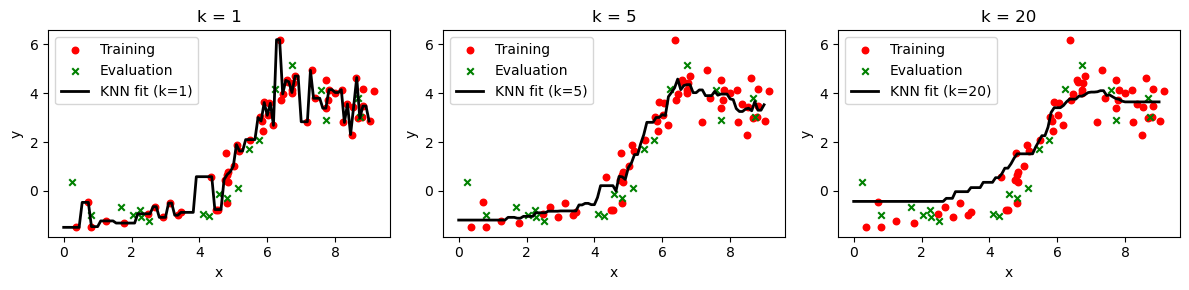

In [4]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

x_spaced = np.linspace(0,9,100).reshape(-1,1)  # get a collection of x-locations at which to plot f(x)

### YOUR CODE STARTS HERE ###

for k,ax in zip([1,5,20],axes):
    knn = KNeighborsRegressor(n_neighbors=k, weights='uniform')
    knn.fit(Xt,Yt)
    y_pred = knn.predict(x_spaced)

#for ax in axes:
    ax.scatter(Xt,Yt, c = 'r',s=22, label="Training")
    ax.scatter(Xe,Ye, c = 'g',s=22, marker='x', label="Evaluation")
    
    ax.plot(x_spaced, y_pred, c='black',linewidth=2, label=f"KNN fit (k={k})")

    ax.set_title(f"k = {k}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend(loc="best")

###  YOUR CODE ENDS HERE  ###

fig.tight_layout()


### P1.3: KNN Model Selection

Train a model for each $k$ in $1 \leq k \leq 30$, and compute their training and validation MSE.  Plot these values as a function of $k$.  What is the best value of $k$ for your model?

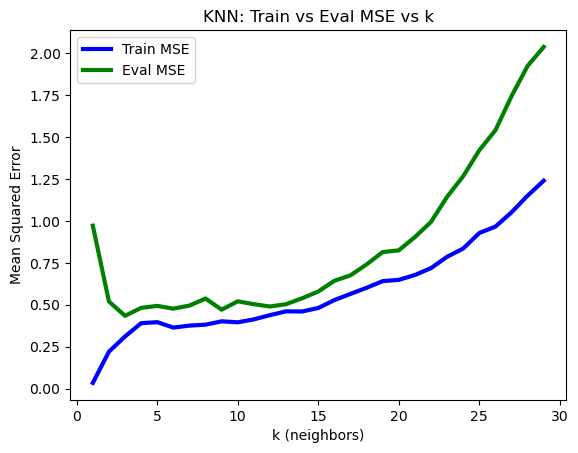

In [5]:
from sklearn.metrics import mean_squared_error
k_values = list(range(1,30))
mse_train = []
mse_eval = []

for i,k in enumerate(k_values):

    ### YOUR CODE STARTS HERE ###
    knn = KNeighborsRegressor(n_neighbors=k, weights='uniform')
    knn.fit(Xt,Yt)
    y_pred_t = knn.predict(Xt)
    y_pred_e = knn.predict(Xe)

    mse_train.append(mean_squared_error(Yt, y_pred_t))
    mse_eval.append(mean_squared_error(Ye, y_pred_e))
    ###  YOUR CODE ENDS HERE  ###

#plt.plot(k_values,mse_train,'b-', k_values,mse_eval,'g-', lw=3)
plt.plot(k_values, mse_train, 'b-', lw=3, label='Train MSE')
plt.plot(k_values, mse_eval, 'g-', lw=3, label='Eval MSE')
plt.xlabel('k (neighbors)')
plt.ylabel('Mean Squared Error')
plt.title('KNN: Train vs Eval MSE vs k')
plt.legend()
plt.show()

# P2: Linear Regression

### P2.1: Train linear regression model
Now, let's train a simple linear regression model on the training data.  After training the model, plot the training data (colored blue), evaluation data (colored red), and our linear fit (a line) together on a single plot.  Also print out the coefficients (slope, `lr.coef_`, and intercept, `lr.intercept_`) of your model after fitting.

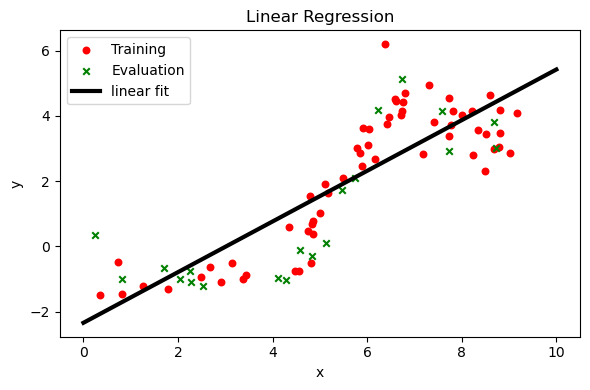

Slope    :[0.77684721]
Intercept:-2.3463013180118293 


In [6]:
plt.figure(figsize=(6,4))

    ### YOUR CODE STARTS HERE ###

lr = LinearRegression().fit(Xt,Yt)      # create and fit model to training data

# to plot the prediction, we'll evaluate our model at a dense set of locations:
x_spaced = np.linspace(0,10,200).reshape(-1,1)   # data points should be shape (m,1)
yhat_spaced = lr.predict(x_spaced)

#plt.figure(figsize=(6, 4))
plt.scatter(Xt, Yt, c = 'r',s=22, label="Training")
plt.scatter(Xe, Ye, c = 'g',s=22, marker='x', label="Evaluation")
plt.plot(x_spaced[:, 0], yhat_spaced, lw=3, label='linear fit', c='k')
plt.xlabel("x")
plt.ylabel("y")
plt.title('Linear Regression')
plt.legend()
plt.tight_layout()
plt.show()



#print(...                      # slope & intercept of your fit model
print(f"Slope    :{lr.coef_.ravel()}")
print(f"Intercept:{lr.intercept_} ")
    ###  YOUR CODE ENDS HERE  ###

### P1.2 Evaluate your model's fit

Compute the mean squared error of your trained model on the training data (the data it was fit on) and the held-out evaluation data.

In [7]:
Yt_pred = lr.predict(Xt)
Yt_MSE = mean_squared_error(Yt,Yt_pred)
print(f"Training   MSE: {Yt_MSE}")


Ye_pred = lr.predict(Xe)
Ye_MSE = mean_squared_error(Ye,Ye_pred)
print(f"Evaluation MSE: {Ye_MSE}")

Training   MSE: 1.2708931254749278
Evaluation MSE: 1.6723519225582435


## Problem 3: Feature Transformations

Often we will want to transform our data (as we saw in class).  A very simple version of this transformation is "normalizing" the data, in which we shift and scale the feature values to a desirable range; typically, zero mean and unit variance, for example.  The ``StandardScaler()`` object in scikit-learn implements such a transformation.

Typically, a pre-processing transformation works in a similar way to training a model: we ``fit`` the object to our training data (in this case, computing the empirical mean and variance of the data), and save the parameters of the transformation (the shift and scale values) so that we can apply exactly the same transformation to subsequent data, for example when asked to predict on a new value of $x$.

So, for example:

In [8]:
scale = StandardScaler().fit(Xt)     # find the desired transformation
X_transformed = scale.transform(Xt)  # & apply it to the training data

# Now, we can train our model on X_transformed...
lr = LinearRegression().fit(X_transformed, Yt)

# Before we predict, we also need to transform the test point's values:
yhat_spaced = lr.predict(scale.transform(x_spaced))

If you like (and as described in the Discussion code), you can use `sklearn`'s `Pipeline` object to simplify the process of sequentially applying transformations before a predictor.

In [9]:
pipe = Pipeline( [('scale',StandardScaler()),('linreg',LinearRegression())])
pipe.fit(Xt,Yt)     # call fit on each element in the pipeline
pipe.predict(Xe)    # call transform on each element but last, then predict on the last 

array([ 0.97409396,  4.42873713,  1.63638308,  0.84879604, -0.76217741,
        1.20679015,  2.49556894,  2.88936242, -0.60108005,  4.39293768,
        3.55165154,  3.65904974, -0.58318032, -1.03067298,  2.11967511,
       -1.71086178, -0.38628358,  1.90487864,  1.40368689, -2.15835442])

## P3.1: Train polynomial regression models
As mentioned in the homework, you can create additional features manually, e.g.,

In [10]:
m,n = Xt.shape            # rest of this cell assumes n=1 feature
Xt2 = np.zeros((m,2))
Xt2[:,0] = Xt[:,0]
Xt2[:,1] = Xt[:,0]**2
print (Xt.shape)
print (Xt2.shape)
print (Xt2[0:6,:])   # look at a few data points to check:

(60, 1)
(60, 2)
[[ 0.72580645  0.526795  ]
 [ 2.4769585   6.13532341]
 [ 7.7304147  59.75931143]
 [ 9.0207373  81.37370144]
 [ 8.6751152  75.25762373]
 [ 6.4631336  41.77209593]]


or, you can create them using SciKit's PolynomialFeatures transform object:

In [11]:
Phi = PolynomialFeatures(degree=2,include_bias=False).fit(Xt)
Xt2 = Phi.transform(Xt)
print (Xt2[0:6,:])   # look at the same data points -- same values

[[ 0.72580645  0.526795  ]
 [ 2.4769585   6.13532341]
 [ 7.7304147  59.75931143]
 [ 9.0207373  81.37370144]
 [ 8.6751152  75.25762373]
 [ 6.4631336  41.77209593]]


**Now, try fitting** a linear regression model using different numbers of polynomial features of $x$.

For each degree $d \in \{0,1,3,5,7,10,15,18\}$:

- Fit a linear regression model using features consisting of all powers of $x$ up to degree $d$
    - Make sure you apply ``StandardScaler`` to the transformed data before training
- Plot the resulting prediction function $f(x)$, along with the training and validation data as before


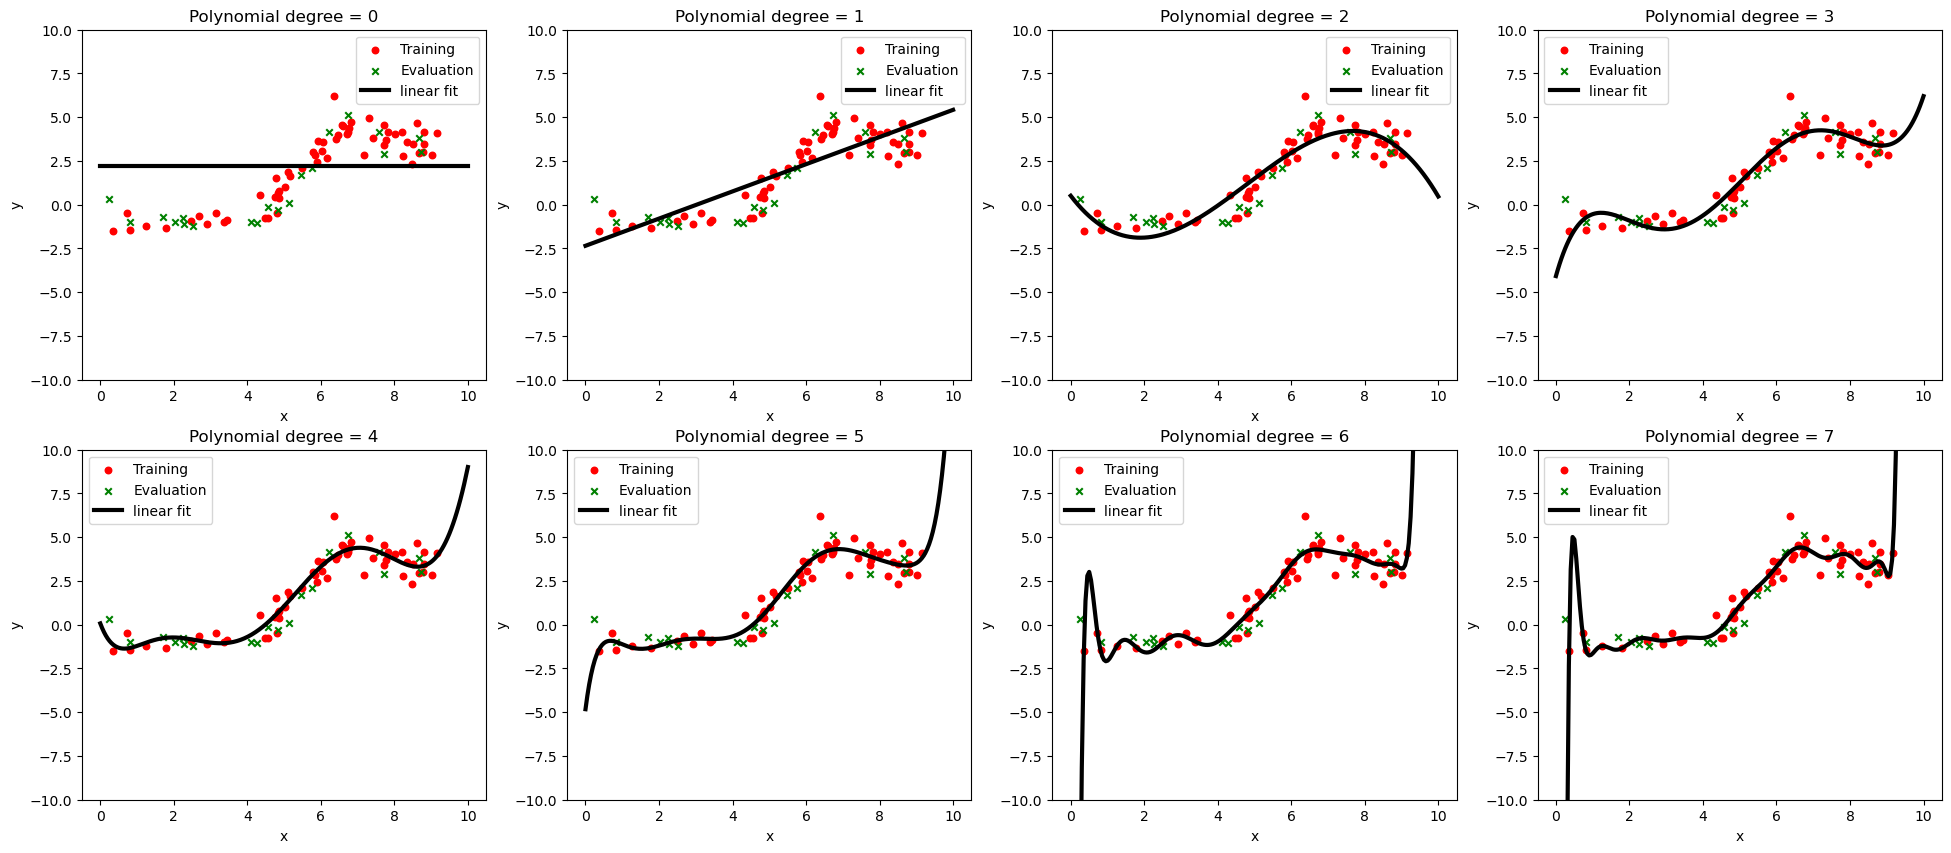

In [27]:
degrees = [0,1,3,5,7,10,15,18]
learners = [[]]*len(degrees)

fig, ax = plt.subplots(2,4, figsize=(24,10))

for i,degree in enumerate(degrees):

    ### YOUR CODE STARTS HERE ###
    pipe = Pipeline([
        ('poly',   PolynomialFeatures(degree=degree)),
        ('scale',  StandardScaler()),
        ('linreg', LinearRegression())
    ])
    pipe.fit(Xt, Yt)
    learners[i] = pipe

    yhat_curve = pipe.predict(x_spaced)

    
    axi = ax[i//4,i%4]
    axi.scatter(Xt, Yt, c = 'r',s=22, label="Training")
    axi.scatter(Xe, Ye, c = 'g',s=22, marker='x', label="Evaluation")
    axi.plot(x_spaced[:, 0], yhat_curve, lw=3, label='linear fit', c='k')
    axi.set_xlabel("x")
    axi.set_ylabel("y")
    axi.set_title(f"Polynomial degree = {i}")
    axi.set_ylim(-10,10 )         # you'll want to set a consistent y-scale for comparison
    axi.legend()
    

        
#     axi = ax[i//4,i%4]
#     axi.plot( ... )  # plot the data and your prediction function
#     axi.set_ylim( ... )         # you'll want to set a consistent y-scale for comparison
#     axi.set_title( ... )        # don't forget to label your plots

    ###  YOUR CODE ENDS HERE  ###


## P3.2 Model Performance
Compute the mean squared error (MSE) loss of each of your trained models on both the training data and the evaluation data.  Plot these errors as a function of degree (so, degree along the horizontal axis, MSE loss as the vertical axis).

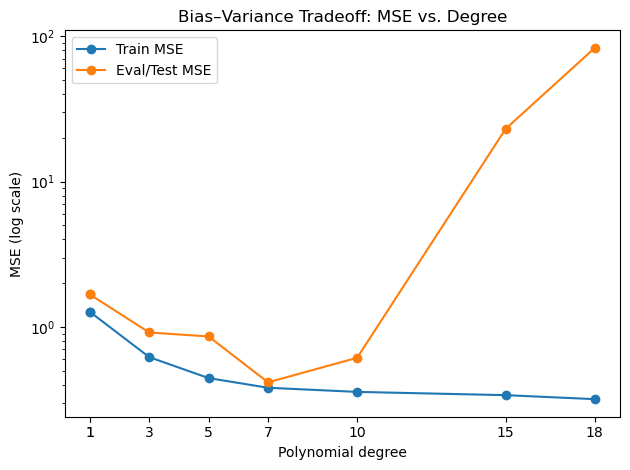

In [13]:
mse_train = [0]*len(degrees)
mse_test = [0]*len(degrees)

for i,degree in enumerate(degrees):
    # Recompute the degree-d poly transform if you didn't save it!
    mse_train[i] = mean_squared_error(Yt,learners[i].predict(Xt))
    mse_test[i] = mean_squared_error(Ye,learners[i].predict(Xe))

    

#plt.semilogy(  )  # plot mse_train and mse_test as a function of the degree

plt.semilogy(degrees, mse_train, '-o', label='Train MSE')
plt.semilogy(degrees, mse_test,  '-o', label='Eval/Test MSE')
plt.xticks(degrees)
plt.xlabel('Polynomial degree')
plt.ylabel('MSE (log scale)')
plt.title('Bias–Variance Tradeoff: MSE vs. Degree')
plt.legend()
plt.tight_layout()
plt.show()




## P3.3 Model Selection
Which degree would you select to use?

**Answer.** From the graphs we can see that `degree 7` would be optimal in both testing and training to monimize the MSE on both train and test.

# P4: Cross-validation
Cross validation is another method of model complexity assessment.  We use it only to determine the correct setting of complexity-altering parameters ("hyperparameters"), such as how many and which features to use, or parameters like "k" in KNN, for which training error alone provides little information.  In particular, cross validation will not produce a specific model (parameter values), only a setting of the hyperparameter values that cross-validation thinks will lead to a model (parameter values) with low test error.

## P4.1:  5-Fold Cross-validation

In the previous problem, we decided what degree of polynomial fit to use based on the performance on a held-out set of test data.  Now suppose that we do not have access to the target values of those data.  How can we determine the best degree?  

We could perform another split; but since this is reducing the number of data available, let us instead use cross-validation to evaluate the degrees.  Cross-validation works by splitting the training data $X_T$ multiple times, one for eack of the $K$ partitions (``n_splits`` in the code), and repeat our entire training and evaluation procedure on each split:

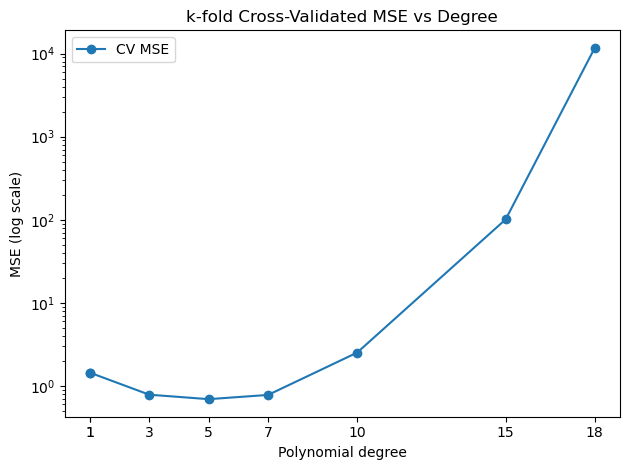

In [14]:
mse_xval = [ 0. ]*len(degrees)
k = 5 # number of splits 
learners = [ [] ]*len(degrees) # I will use pipes

for j,degree in enumerate(degrees):   # loop over desired degree values

    ### YOUR CODE STARTS HERE ###

    xval = KFold(n_splits = k)      # split into k=5 splits
    fold_mse = []
    for train_index, val_index in xval.split(Xt):
        # Extract the ith cross-validation fold (training/validation split)
        Xti,Xvi,Yti,Yvi = Xt[train_index],Xt[val_index],Yt[train_index],Yt[val_index]
        
        # Now, build the model:
        # Create a polynomial feature expansion
        # Create a StandardScaler
        # Fit the linear regression model on the training folds, Xti/Yti
        
        pipe = Pipeline([
            ('poly',   PolynomialFeatures(degree=degree, include_bias=False)),
            ('scale',  StandardScaler()),
            ('linreg', LinearRegression())
            ])
        pipe.fit(Xti, Yti)
        Yvi_pred = pipe.predict(Xvi)
        
        # Compute the MSE on the evaluation fold, Xvi/Yvi
        fold_mse.append(mean_squared_error(Yvi, Yvi_pred))
        learners[j] = pipe
        
    # Evaluate the quality of this degree by averaging the MSE across the five folds
    mse_xval[j] = float(np.mean(fold_mse))

        
        
        
# Plot the estimated MSE from cross-validation as a function of the degree
plt.semilogy(degrees, mse_xval, '-o', label='CV MSE')
plt.xticks(degrees)
plt.xlabel('Polynomial degree')
plt.ylabel('MSE (log scale)')
plt.title('k-fold Cross-Validated MSE vs Degree')
plt.legend()
plt.tight_layout()
plt.show()             
    ###  YOUR CODE ENDS HERE  ###

## P4.2: Cross-validation model selection

What degree would you choose based on the cross validation performance?

**Answer.** From this test it appears that the best degree is `5`.

## P4.3 Comparison to test performance

How do the MSE estimates from 5-fold cross-validation compare to the estimated test performance you found from your held-out data, $X_E$?  Explain briefly.

**Answer.** The MSE seems to not be too far off from the original assumption; that the best degree is around 5-7, then gets much worse as degree increases. And so we would pick roughly the same degree.

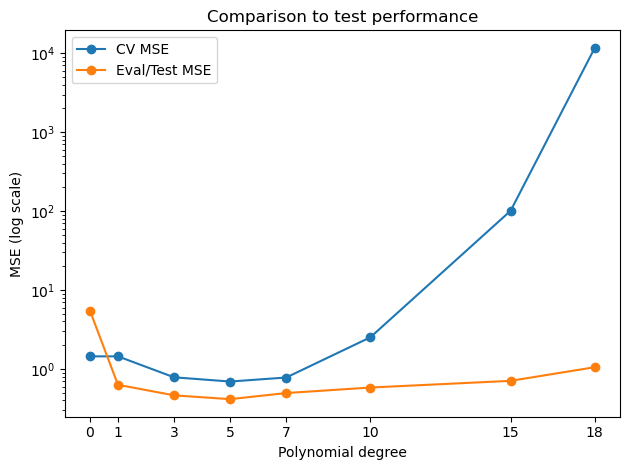

In [28]:
plt.semilogy(degrees, mse_xval, '-o', label='CV MSE')
plt.semilogy(degrees, mse_test,  '-o', label='Eval/Test MSE')
plt.xticks(degrees)
plt.xlabel('Polynomial degree')
plt.ylabel('MSE (log scale)')
plt.title('Comparison to test performance')
plt.legend()
plt.tight_layout()
plt.show()



# P5 : Regularization

In systems where we already have a lot of features, or where we do not know which of the many features we might construct will be helpful, we can use regularization to help us control overfitting.

## P5.1: Regularized Regression
In `sklearn`, linear regression with quadratic (L2) regularization is implemented in a different object, `Ridge`.  Use this ridge regression model to fit your degree-18 data using various amounts of regularization:
$$ \alpha \in \{10^{-20},10^{-12},10^{-8},10^{-6},10^{-4},0.01,0.1,1.0\}$$
Plot the training and evaluation data, along with the predicted regression function for each value.

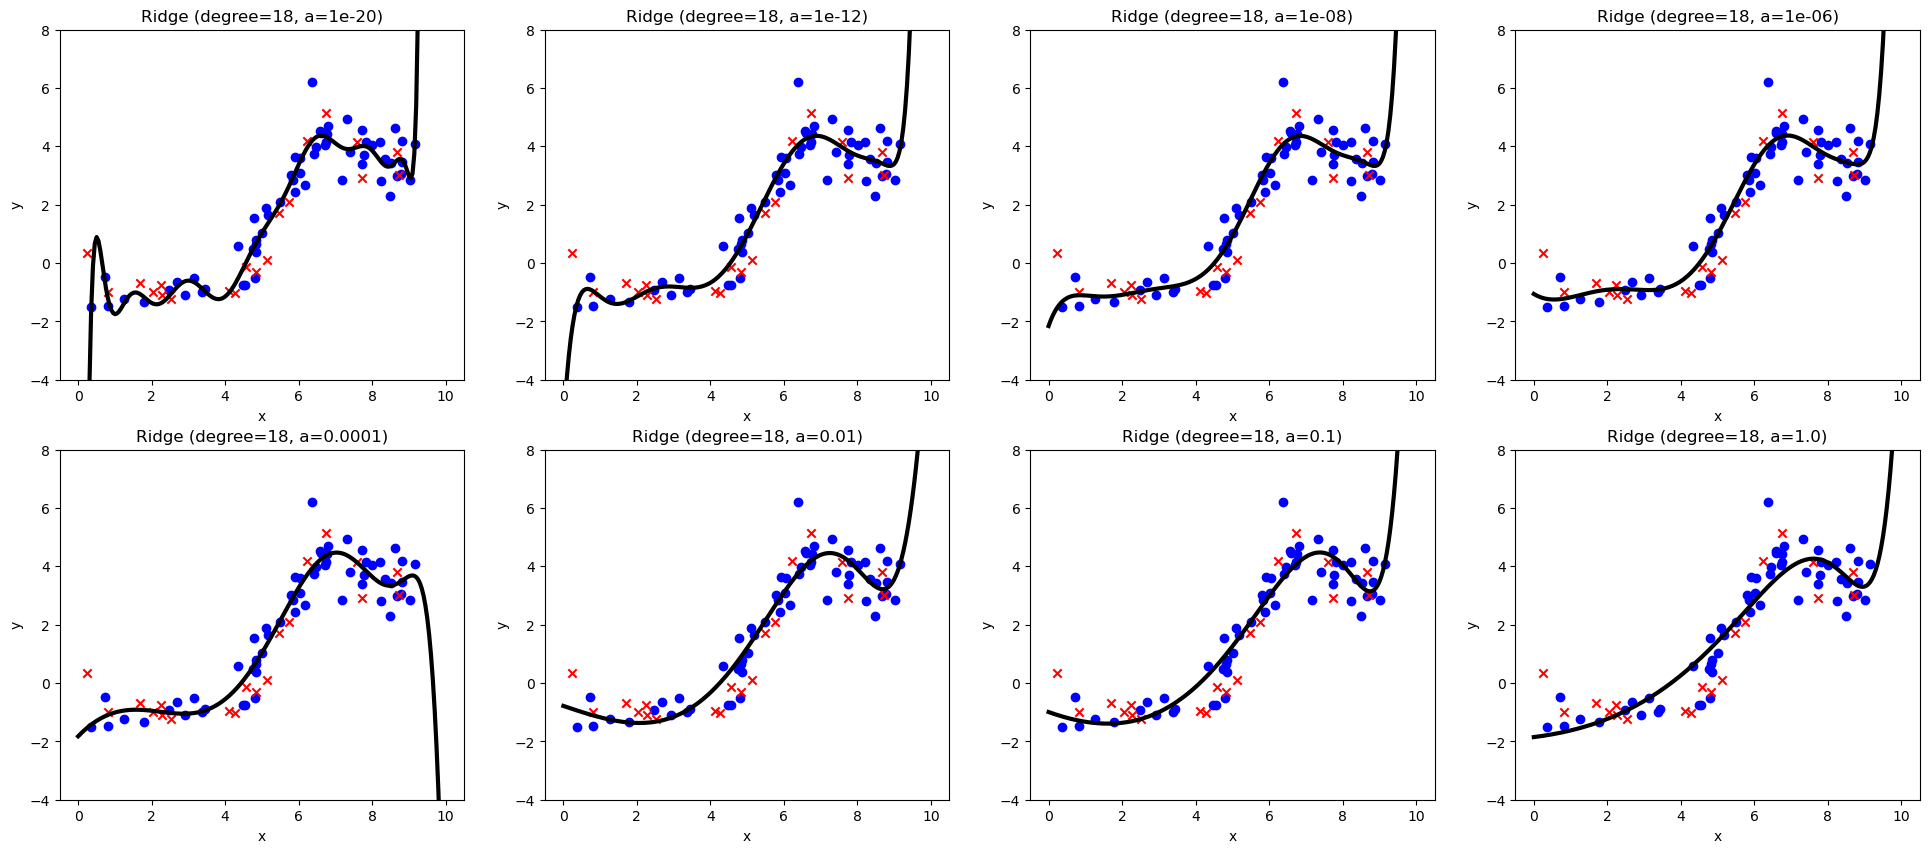

In [16]:
alphas = [1e-20, 1e-12, 1e-8, 1e-6, 1e-4, 1e-2, 1e-1, 1.]
learners = [ None ]*len(alphas)

fig, ax = plt.subplots(2,4, figsize=(24,10))

for i,alpha in enumerate(alphas):

    ### YOUR CODE STARTS HERE ###
    pipe = Pipeline([
        ('poly',   PolynomialFeatures(degree=degree, include_bias=False)),
        ('scale',  StandardScaler()),
        ('ridge',  Ridge(alpha=alpha, fit_intercept=True, random_state=0))
        ])

    
    pipe.fit(Xt, Yt)
    learners[i] = pipe

    # predictions on dense grid for the curve
    yhat_curve = pipe.predict(x_spaced)
    # Fit your learner and save it to your list
    learners[i] = pipe
    
    axi = ax[i//4,i%4]
    axi.scatter(Xt, Yt, c='b',  label='train')
    axi.scatter(Xe, Ye,  c='r', marker = 'x', label='eval')
    axi.plot(x_spaced, yhat_curve, c='k', lw=3, label='ridge fit')   
    axi.set_ylim(-4,8 )         # you'll want to set a consistent y-scale for comparison
    axi.set_title(f"Ridge (degree={degree}, a={alpha})")
    axi.set_xlabel("x")
    axi.set_ylabel("y")


    ###  YOUR CODE ENDS HERE  ###


## P5.2: Training and Test Performance

Using your trained models, evaluate the training and test MSE as a function of the regularization $\alpha$.  Plot these functions. (It is best to use a log-scale for both alpha and MSE, for clarity.)

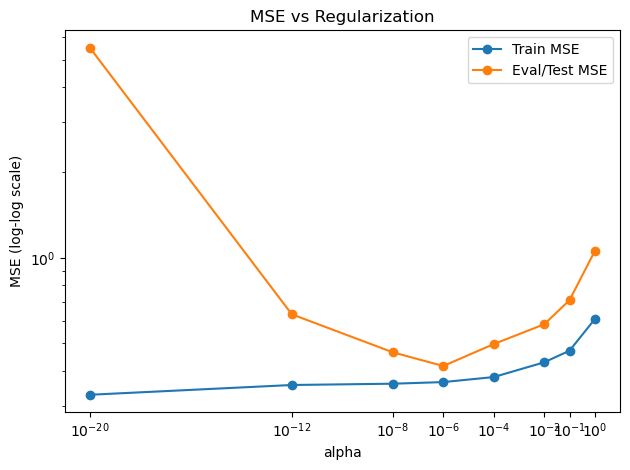

In [17]:
mse_train = [0]*len(alphas)
mse_test = [0]*len(alphas)

for i,alpha in enumerate(alphas):
    mse_train[i] =  mean_squared_error(Yt, learners[i].predict(Xt))
    mse_test[i] =  mean_squared_error(Ye, learners[i].predict(Xe))

plt.loglog(alphas, mse_train, '-o', label='Train MSE')
plt.loglog(alphas, mse_test,  '-o', label='Eval/Test MSE')
plt.xticks(alphas)
plt.xlabel('alpha')
plt.ylabel('MSE (log-log scale)')
plt.title('MSE vs Regularization')
plt.legend()
plt.tight_layout()
plt.show()


## P5.3: Model Selection
Which regularization value $\alpha$ would you select?  Identify in which regions $\alpha$ is underfitting or overfitting.

**Answer.** From the graphs, it seems that $\alpha= 10^{-6}$ is the best options for both Train and Eval. If we conisider alpha too small, we overfeat the train model and the test MSE is very bad. of alpha is too large, the model is underfitting and not good.

---
### Statement of Collaboration (5 points)

It is **mandatory** to include a Statement of Collaboration in each submission, with respect to the guidelines below. Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.

All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments, in particular, I encourage the students to organize (perhaps using EdD) to
discuss the task descriptions, requirements, bugs in my code, and the relevant technical content before they start
working on it. However, you should not discuss the specific solutions, and, as a guiding principle, you are not
allowed to take anything written or drawn away from these discussions (i.e. no photographs of the blackboard,
written notes, referring to EdD, etc.). Especially after you have started working on the assignment, try
to restrict the discussion to EdD as much as possible, so that there is no doubt as to the extent of your
collaboration.

**ANswer.** Emeric Battaglia and I worked independently on the homework, and then confirmed our results were similar. He pointed out a mistake I had in my code in problem 1.2 where I accidently plotted the same graph three times. Ops. And suggested to add a graph for problem 4.3.